# ***Librairie chez Lapage***

# PARTIE 1 : TRAITEMENT DES DONNEES

# IMPORTATION LIBRAIRIES

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from datetime import date
import scipy.stats as st


In [47]:
#from pandas_profiling import ProfileReport

###  Fonctions

In [48]:
def check_missing_values(df):
    return df.isna().sum()

In [49]:
def remove_missing_values(df):
    return df.dropna(inplace=True)

In [50]:
def check_oultiers(df):
    return df.boxplot(figsize=(15,5))

In [51]:
def histogram(df):
    return df.hist(figsize=(20,8))

In [52]:
def matrix(df):
    pd.plotting.scatter_matrix((df), alpha=0.2)
    return matrix

In [53]:
def check_duplicates(df):
    return df.duplicated(subset=None, keep='first')

In [54]:
def find_all_outliers(v):
    Q1 = np.quantile(v, 0.25)
    Q3 = np.quantile(v, 0.75)
    EIQ = Q3 - Q1
    LI = Q1 - (EIQ*1.5)
    LS = Q3 + (EIQ*1.5)
    i = list(v.index[(v < LI) | (v > LS)])
    val = list(v[i])
    return i, val

In [55]:
#liste des données manquantes après jointure
def post_merge(df):
    
    check = df_final["product_id"].values.tolist()
    
    return erp[~erp.product_id.isin(check)]



In [56]:
# Vérification merge (toutes les données sont dans les 2 DF)
def post_merge_data(df):
    (df).query(" _merge != 'both' ")
    return (df);

# IMPORTATION DES DONNEES ET NETTOYAGE 

### PRODUCTS

In [57]:
products = pd.read_csv(r'C:\Users\melle\FORMATION\P6_Mendy\SOURCE\products.csv')
products.head(3)

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0


In [58]:
products.shape

(3287, 3)

In [59]:
products.dtypes

id_prod     object
price      float64
categ        int64
dtype: object

In [60]:
check_missing_values(products)

id_prod    0
price      0
categ      0
dtype: int64

### TRANSACTIONS

In [61]:
transactions = pd.read_csv(r'C:\Users\melle\FORMATION\P6_Mendy\SOURCE\transactions.csv')
transactions.head(3)

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714


In [62]:
transactions.shape

(679532, 4)

In [63]:
# localisation données test
transactions.loc[transactions['id_prod']=='T_0']

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


In [64]:
# Collecte des Index des données test
indexNames = transactions.loc[transactions['id_prod']=='T_0'].index

In [65]:
#Suppression des données test
transactions.drop(indexNames , inplace=True)

In [66]:
transactions.shape

(679332, 4)

In [67]:
check_missing_values(transactions)

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64

In [68]:
transactions.dtypes

id_prod       object
date          object
session_id    object
client_id     object
dtype: object

In [69]:
transactions['date'] = transactions['date'].str.split('.')
transactions['date']

0         [2022-05-20 13:21:29, 043970]
1         [2022-02-02 07:55:19, 149409]
2         [2022-06-18 15:44:33, 155329]
3         [2021-06-24 04:19:29, 835891]
4         [2023-01-11 08:22:08, 194479]
                      ...              
679527    [2022-01-15 13:05:06, 246925]
679528    [2022-03-19 16:03:23, 429229]
679529    [2022-12-20 04:33:37, 584749]
679530    [2021-07-16 20:36:35, 350579]
679531    [2022-09-28 01:12:01, 973763]
Name: date, Length: 679332, dtype: object

In [70]:
transactions['date'] = transactions['date'].str.get(0)

In [71]:
transactions['date'] = transactions['date'].str.split(' ')

In [72]:
transactions['date_longue'] = transactions['date'].str.get(0)
transactions['date_longue'] 

0         2022-05-20
1         2022-02-02
2         2022-06-18
3         2021-06-24
4         2023-01-11
             ...    
679527    2022-01-15
679528    2022-03-19
679529    2022-12-20
679530    2021-07-16
679531    2022-09-28
Name: date_longue, Length: 679332, dtype: object

In [73]:
transactions.date_longue = pd.to_datetime(transactions.date_longue, errors='raise', dayfirst=False, yearfirst=True, 
                                     utc=None, format=None, exact=True, unit=None, 
                                     infer_datetime_format=False, origin='unix', cache=True)

In [74]:
transactions.dtypes

id_prod                object
date                   object
session_id             object
client_id              object
date_longue    datetime64[ns]
dtype: object

In [75]:
transactions['date_longue'] = pd.to_datetime(transactions.date_longue, format="%d %m %Y")

In [76]:
transactions.dtypes

id_prod                object
date                   object
session_id             object
client_id              object
date_longue    datetime64[ns]
dtype: object

In [77]:
transactions.dtypes

id_prod                object
date                   object
session_id             object
client_id              object
date_longue    datetime64[ns]
dtype: object

In [78]:
transactions["date_longue"] = transactions["date_longue"].astype("datetime64")

In [79]:
transactions.head(2)

,id_prod,date,session_id,client_id,date_longue
0,0_1518,"[2022-05-20, 13:21:29]",s_211425,c_103,2022-05-20
1,1_251,"[2022-02-02, 07:55:19]",s_158752,c_8534,2022-02-02


In [80]:
transactions.dtypes

id_prod                object
date                   object
session_id             object
client_id              object
date_longue    datetime64[ns]
dtype: object

In [86]:
transactions['date_longue'].dt.strftime(" %Y %m")

0          2022 05
1          2022 02
2          2022 06
3          2021 06
4          2023 01
            ...   
679527     2022 01
679528     2022 03
679529     2022 12
679530     2021 07
679531     2022 09
Name: date_longue, Length: 679332, dtype: object

In [82]:
transactions['date_courte'] = transactions['date_longue'].dt.strftime(" %Y %m")

transactions['date_année'] = transactions['date_longue'].dt.strftime("%Y")

In [83]:
temps = ['date_courte', 'date_année']
for var in temps:
    transactions[var] = transactions[var].astype("datetime64")

In [84]:
transactions.isna().sum().sum()

0

In [85]:
transactions.head(3)

,id_prod,date,session_id,client_id,date_longue,date_courte,date_année
0,0_1518,"[2022-05-20, 13:21:29]",s_211425,c_103,2022-05-20,2022-05-01,2022-01-01
1,1_251,"[2022-02-02, 07:55:19]",s_158752,c_8534,2022-02-02,2022-02-01,2022-01-01
2,0_1277,"[2022-06-18, 15:44:33]",s_225667,c_6714,2022-06-18,2022-06-01,2022-01-01


In [96]:
transactions.dtypes

id_prod                object
date                   object
session_id             object
client_id              object
date_longue    datetime64[ns]
date_courte    datetime64[ns]
date_année     datetime64[ns]
dtype: object

### CUSTOMERS


In [140]:
customers = pd.read_csv(r'C:\Users\melle\FORMATION\P6_Mendy\SOURCE\customers.csv')
customers.head(3)

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984


In [141]:
#customers = pd.read_csv("./FORMATION/P6_Mendy/SOURCE/customers.csv")


In [142]:
customers.shape

(8623, 3)

In [143]:
check_missing_values(customers)

client_id    0
sex          0
birth        0
dtype: int64

In [144]:
customers.dtypes

client_id    object
sex          object
birth         int64
dtype: object

In [145]:
### import datetime

currDate= datetime.now()
print(currDate)

2021-11-24 10:55:42.989282


In [146]:
# Création colonne age
customers['age'] = (currDate.year - customers['birth'])

In [147]:
customers.head()

,client_id,sex,birth,age
0,c_4410,f,1967,54
1,c_7839,f,1975,46
2,c_1699,f,1984,37
3,c_5961,f,1962,59
4,c_5320,m,1943,78


# CREATION DU DF_FINAL

In [187]:
df1 = customers.merge(transactions, on='client_id', how='outer')

In [188]:
df2 = df1.merge(products, on='id_prod', how='outer')

In [189]:
df2.sample(2)

,client_id,sex,birth,age,id_prod,date,session_id,date_longue,date_courte,date_année,price,categ
410975,c_6357,m,1940.0,81.0,0_1355,"[2022-03-12, 18:22:21]",s_178175,2022-03-12,2022-03-01,2022-01-01,18.99,0.0
2533,c_5984,f,1983.0,38.0,0_1455,"[2022-10-25, 23:22:07]",s_288030,2022-10-25,2022-10-01,2022-01-01,8.99,0.0


In [190]:
df2.shape

(679377, 12)

In [191]:
check_missing_values(df2)

client_id       22
sex             22
birth           22
age             22
id_prod         23
date            45
session_id      45
date_longue     45
date_courte     45
date_année      45
price          244
categ          244
dtype: int64

<AxesSubplot:>

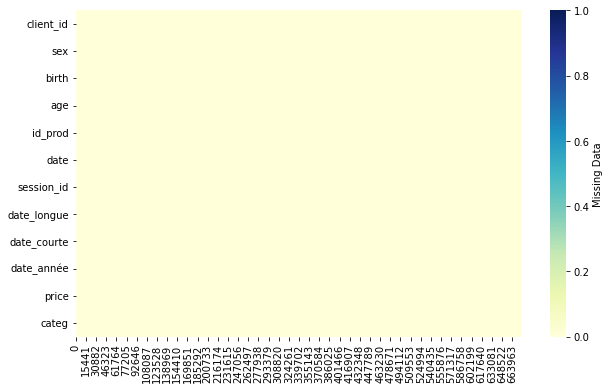

In [153]:
plt.figure(figsize=(10,6))
sns.heatmap(df2.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

In [192]:
def post_merge(df):
    
    check = customers["client_id"].values.tolist()
    
    return df2[~df2.client_id.isin(check)]

In [155]:
# Données manquantes apres jointure
# Produits avec 0 ventes
id_prod_sans_vente = post_merge(df2)
id_prod_sans_vente

,client_id,sex,birth,age,id_prod,date,session_id,date_longue,date_courte,date_année,price,categ
679355,NaN,NaN,NaN,NaN,0_1016,NaN,NaN,NaT,NaT,NaT,35.06,0.0
679356,NaN,NaN,NaN,NaN,0_1780,NaN,NaN,NaT,NaT,NaT,1.67,0.0
679357,NaN,NaN,NaN,NaN,T_0,NaN,NaN,NaT,NaT,NaT,-1.00,0.0
679358,NaN,NaN,NaN,NaN,0_1062,NaN,NaN,NaT,NaT,NaT,20.08,0.0
679359,NaN,NaN,NaN,NaN,0_1119,NaN,NaN,NaT,NaT,NaT,2.99,0.0
679360,NaN,NaN,NaN,NaN,0_1014,NaN,NaN,NaT,NaT,NaT,1.15,0.0
679361,NaN,NaN,NaN,NaN,1_0,NaN,NaN,NaT,NaT,NaT,31.82,1.0
679362,NaN,NaN,NaN,NaN,0_1318,NaN,NaN,NaT,NaT,NaT,20.92,0.0
679363,NaN,NaN,NaN,NaN,0_1800,NaN,NaN,NaT,NaT,NaT,22.05,0.0
679364,NaN,NaN,NaN,NaN,0_1645,NaN,NaN,NaT,NaT,NaT,2.99,0.0


In [156]:
### Enregistrement du id_prod_sans_vente sous format CSV
id_prod_sans_vente.to_csv(r'C:\Users\melle\FORMATION\P6_Mendy\id_prod_sans_vente.csv')

In [193]:
id_prod_sans_vente.shape

(22, 12)

In [194]:
def post_merge_2(df):
    
    check = transactions["id_prod"].values.tolist()
    
    return df2[~df2.id_prod.isin(check)]

In [195]:
# Données Customers manquant aprés jointure
sans_transaction = post_merge_2(df2)
sans_transaction 
#id_prod_sans_vente + Liste client sans achat

,client_id,sex,birth,age,id_prod,date,session_id,date_longue,date_courte,date_année,price,categ
667994,c_8253,f,2001.0,20.0,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN
667995,c_3789,f,1997.0,24.0,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN
667996,c_4406,f,1998.0,23.0,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN
667997,ct_0,f,2001.0,20.0,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN
667998,c_2706,f,1967.0,54.0,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN
667999,c_3443,m,1959.0,62.0,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN
668000,c_4447,m,1956.0,65.0,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN
668001,c_3017,f,1992.0,29.0,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN
668002,c_4086,f,1992.0,29.0,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN
668003,c_6930,m,2004.0,17.0,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN


In [196]:
client_sans_achat = sans_transaction[:23]

In [197]:
### Enregistrement du sans_transaction sous format CSV
client_sans_achat.to_csv(r'C:\Users\melle\FORMATION\P6_Mendy\client_sans_achat.csv')


In [198]:
sans_transaction.index

Int64Index([667994, 667995, 667996, 667997, 667998, 667999, 668000, 668001,
            668002, 668003, 668004, 668005, 668006, 668007, 668008, 668009,
            668010, 668011, 668012, 668013, 668014, 668015, 668016, 679355,
            679356, 679357, 679358, 679359, 679360, 679361, 679362, 679363,
            679364, 679365, 679366, 679367, 679368, 679369, 679370, 679371,
            679372, 679373, 679374, 679375, 679376],
           dtype='int64')

In [199]:
# Collecte des Index des données test
indexNames = sans_transaction.index
#Suppression des données test
df2 = df2.drop(indexNames)

In [200]:
df2.isna().sum()

client_id        0
sex              0
birth            0
age              0
id_prod          0
date             0
session_id       0
date_longue      0
date_courte      0
date_année       0
price          221
categ          221
dtype: int64

In [201]:
# Comme id_prod = 0... categ0 donc je remplace price par moyenne prix de la categ 0
id_prod_0_2245 = df2.query("id_prod=='0_2245'")
id_prod_0_2245

,client_id,sex,birth,age,id_prod,date,session_id,date_longue,date_courte,date_année,price,categ
542051,c_4505,m,1976.0,45.0,0_2245,"[2022-01-09, 09:23:31]",s_147220,2022-01-09,2022-01-01,2022-01-01,NaN,NaN
542052,c_4505,m,1976.0,45.0,0_2245,"[2022-11-09, 09:23:31]",s_295013,2022-11-09,2022-11-01,2022-01-01,NaN,NaN
542053,c_3468,f,1981.0,40.0,0_2245,"[2021-09-11, 10:52:05]",s_88251,2021-09-11,2021-09-01,2021-01-01,NaN,NaN
542054,c_3468,f,1981.0,40.0,0_2245,"[2022-05-11, 10:52:05]",s_206902,2022-05-11,2022-05-01,2022-01-01,NaN,NaN
542055,c_1403,f,1978.0,43.0,0_2245,"[2022-09-15, 14:26:50]",s_268455,2022-09-15,2022-09-01,2022-01-01,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
542267,c_4283,f,1976.0,45.0,0_2245,"[2022-08-01, 02:46:38]",s_246657,2022-08-01,2022-08-01,2022-01-01,NaN,NaN
542268,c_4283,f,1976.0,45.0,0_2245,"[2021-09-01, 02:46:38]",s_83377,2021-09-01,2021-09-01,2021-01-01,NaN,NaN
542269,c_6236,f,1976.0,45.0,0_2245,"[2022-02-25, 00:08:08]",s_170426,2022-02-25,2022-02-01,2022-01-01,NaN,NaN
542270,c_4453,m,1981.0,40.0,0_2245,"[2022-02-16, 11:35:20]",s_166050,2022-02-16,2022-02-01,2022-01-01,NaN,NaN


In [202]:
df2["categ"] = df2["categ"].fillna(0.0)

In [203]:
# Remplacement de la valeur manquante (categ) par 0 car id_prod = 0_XXXX
df2.isna().sum()

client_id        0
sex              0
birth            0
age              0
id_prod          0
date             0
session_id       0
date_longue      0
date_courte      0
date_année       0
price          221
categ            0
dtype: int64

In [204]:
# Calcul de la moyenne du peix de vente des articles de la catégorie 0
ca_par_categ = df2.groupby("categ").agg({"price":"mean"}).reset_index()
ca_par_categ

,categ,price
0,0.0,10.638188
1,1.0,20.485730
2,2.0,76.207412


In [205]:
mean_categ_0 = ca_par_categ.iloc[0][1]
df2["price"] = df2["price"].fillna(mean_categ_0)

In [206]:
 df2.query("id_prod=='0_2245'")

,client_id,sex,birth,age,id_prod,date,session_id,date_longue,date_courte,date_année,price,categ
542051,c_4505,m,1976.0,45.0,0_2245,"[2022-01-09, 09:23:31]",s_147220,2022-01-09,2022-01-01,2022-01-01,10.638188,0.0
542052,c_4505,m,1976.0,45.0,0_2245,"[2022-11-09, 09:23:31]",s_295013,2022-11-09,2022-11-01,2022-01-01,10.638188,0.0
542053,c_3468,f,1981.0,40.0,0_2245,"[2021-09-11, 10:52:05]",s_88251,2021-09-11,2021-09-01,2021-01-01,10.638188,0.0
542054,c_3468,f,1981.0,40.0,0_2245,"[2022-05-11, 10:52:05]",s_206902,2022-05-11,2022-05-01,2022-01-01,10.638188,0.0
542055,c_1403,f,1978.0,43.0,0_2245,"[2022-09-15, 14:26:50]",s_268455,2022-09-15,2022-09-01,2022-01-01,10.638188,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
542267,c_4283,f,1976.0,45.0,0_2245,"[2022-08-01, 02:46:38]",s_246657,2022-08-01,2022-08-01,2022-01-01,10.638188,0.0
542268,c_4283,f,1976.0,45.0,0_2245,"[2021-09-01, 02:46:38]",s_83377,2021-09-01,2021-09-01,2021-01-01,10.638188,0.0
542269,c_6236,f,1976.0,45.0,0_2245,"[2022-02-25, 00:08:08]",s_170426,2022-02-25,2022-02-01,2022-01-01,10.638188,0.0
542270,c_4453,m,1981.0,40.0,0_2245,"[2022-02-16, 11:35:20]",s_166050,2022-02-16,2022-02-01,2022-01-01,10.638188,0.0


In [207]:
df2.isna().sum()

client_id      0
sex            0
birth          0
age            0
id_prod        0
date           0
session_id     0
date_longue    0
date_courte    0
date_année     0
price          0
categ          0
dtype: int64

In [208]:
df2.head(1)

,client_id,sex,birth,age,id_prod,date,session_id,date_longue,date_courte,date_année,price,categ
0,c_4410,f,1967.0,54.0,0_1316,"[2021-12-29, 09:11:18]",s_141762,2021-12-29,2021-12-01,2021-01-01,7.2,0.0


In [209]:
df_final = df2[['client_id', 'birth', 'sex', 'age', 'id_prod','price', 'categ', 'session_id',
       'date_longue', 'date_courte','date_année']]

In [210]:
df_final.dtypes

client_id              object
birth                 float64
sex                    object
age                   float64
id_prod                object
price                 float64
categ                 float64
session_id             object
date_longue    datetime64[ns]
date_courte    datetime64[ns]
date_année     datetime64[ns]
dtype: object

In [211]:
df_final.isna().sum().sum()

0

In [212]:
client = ['birth' ,'age', 'categ']
for var in client:
    df_final.loc[:, var] = df_final[var].astype(int)

C:\Users\melle\anaconda3\envs\New_envi\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [ ]:
  self._setitem_single_column(ilocs[0], value, pi)

In [179]:
df_final["birth"] = df_final["birth"].astype(int, inplace=True)
df_final["age"] = df_final["age"].astype(int)
df_final["categ"] = df_final["categ"].astype(int)

C:\Users\melle\AppData\Local\Temp/ipykernel_6092/1829622993.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final["birth"] = df_final["birth"].astype(int)
C:\Users\melle\AppData\Local\Temp/ipykernel_6092/1829622993.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final["age"] = df_final["age"].astype(int)
C:\Users\melle\AppData\Local\Temp/ipykernel_6092/1829622993.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

# DF_FINAL

In [215]:
df_final.head()

,client_id,birth,sex,age,id_prod,price,categ,session_id,date_longue,date_courte,date_année
0,c_4410,1967,f,54,0_1316,7.2,0,s_141762,2021-12-29,2021-12-01,2021-01-01
1,c_4410,1967,f,54,0_1316,7.2,0,s_186233,2022-03-29,2022-03-01,2022-01-01
2,c_4410,1967,f,54,0_1316,7.2,0,s_215758,2022-05-29,2022-05-01,2022-01-01
3,c_3654,1978,f,43,0_1316,7.2,0,s_125143,2021-11-26,2021-11-01,2021-01-01
4,c_3654,1978,f,43,0_1316,7.2,0,s_258546,2022-08-26,2022-08-01,2022-01-01


In [216]:
### Enregistrement du DF_FINAL sous format CSV
df_final.to_csv(r'C:\Users\melle\FORMATION\P6_Mendy\P6_DF_FINAL.csv')

In [217]:
df_final.shape

(679332, 11)